In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [29]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

  
# Set DataFrame as the Stock Ticker
adobe = DataReader("ADBE", 'yahoo', start, end)

In [30]:
adobe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-05,198.460007,188.000000,194.059998,190.270004,3801300,190.270004
2018-02-06,194.820007,182.100006,186.589996,194.470001,4480000,194.470001
2018-02-07,196.240005,192.020004,193.869995,192.339996,2988000,192.339996
2018-02-08,192.970001,185.020004,192.839996,185.160004,3978700,185.160004
2018-02-09,189.710007,179.339996,187.330002,187.990005,3818800,187.990005
...,...,...,...,...,...,...
2021-02-01,474.799988,459.820007,462.279999,470.000000,2554800,470.000000
2021-02-02,487.369995,472.549988,473.649994,484.929993,3022000,484.929993
2021-02-03,488.850006,479.170013,487.089996,481.920013,2146900,481.920013


In [31]:
adobe.describe()

,High,Low,Open,Close,Volume,Adj Close
count,757.000000,757.000000,757.000000,757.000000,7.570000e+02,757.000000
mean,322.958375,314.624729,319.086909,319.091823,3.013606e+06,319.091823
std,91.041412,88.564092,90.085671,89.879535,1.421517e+06,89.879535
min,189.710007,179.339996,186.589996,185.160004,5.892000e+05,185.160004
25%,254.800003,250.130005,252.729996,253.389999,2.097400e+06,253.389999
50%,285.869995,278.350006,283.140015,282.440002,2.634200e+06,282.440002
75%,374.480011,367.149994,371.589996,371.420013,3.553300e+06,371.420013
max,536.880005,521.409973,536.250000,533.799988,1.218940e+07,533.799988


In [32]:
adobe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2018-02-05 to 2021-02-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       757 non-null    float64
 1   Low        757 non-null    float64
 2   Open       757 non-null    float64
 3   Close      757 non-null    float64
 4   Volume     757 non-null    int64  
 5   Adj Close  757 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


Text(0.5, 0, '')

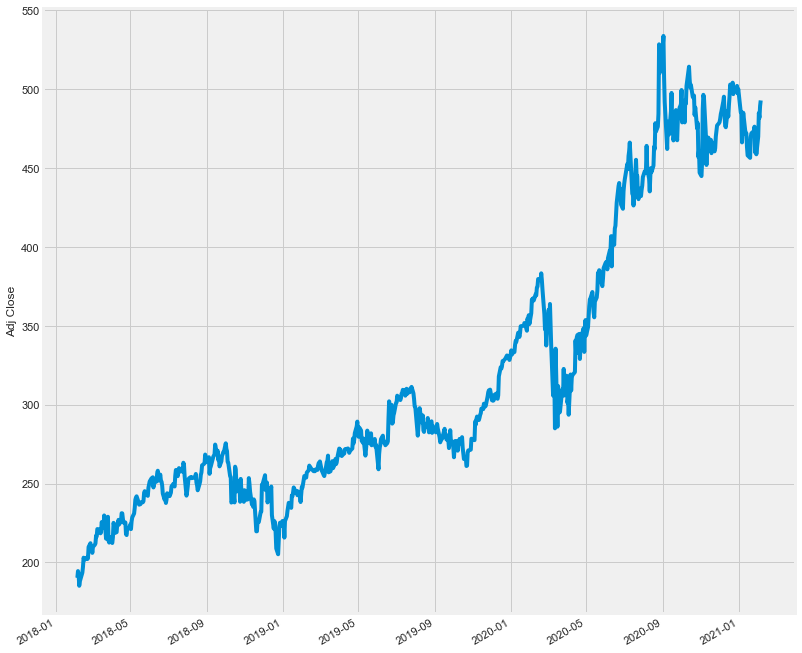

In [33]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
# plt.title(f"{tech_list[i - 1]}")

Text(0.5, 0, '')

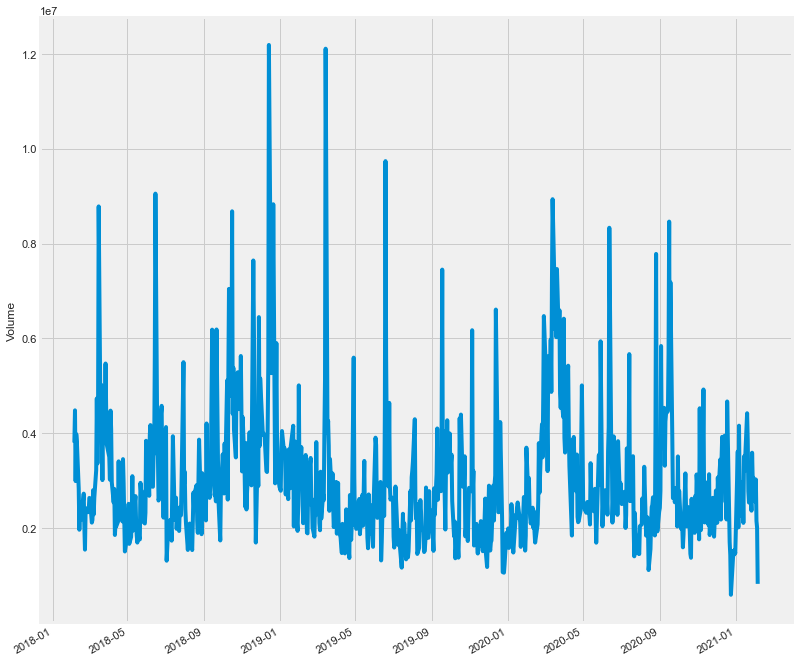

In [34]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)

In [35]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    adobe[column_name] = adobe['Adj Close'].rolling(ma).mean()

In [36]:
adobe.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')

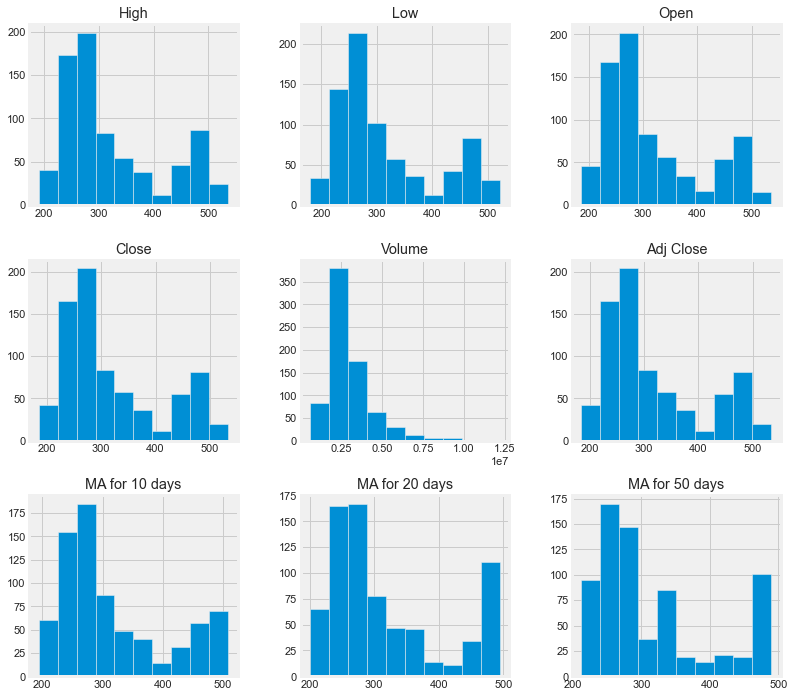

In [37]:
adobe.hist(figsize=(12, 12));

<Figure size 864x576 with 0 Axes>

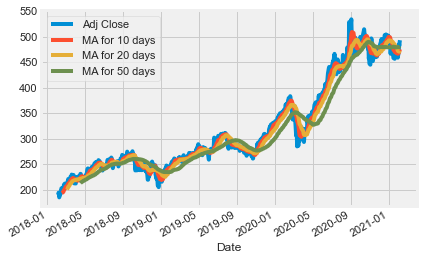

In [38]:
plt.figure(figsize=(12, 8))
adobe[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.legend(loc='best')
plt.grid(True)
# plt.set_title('Roku')

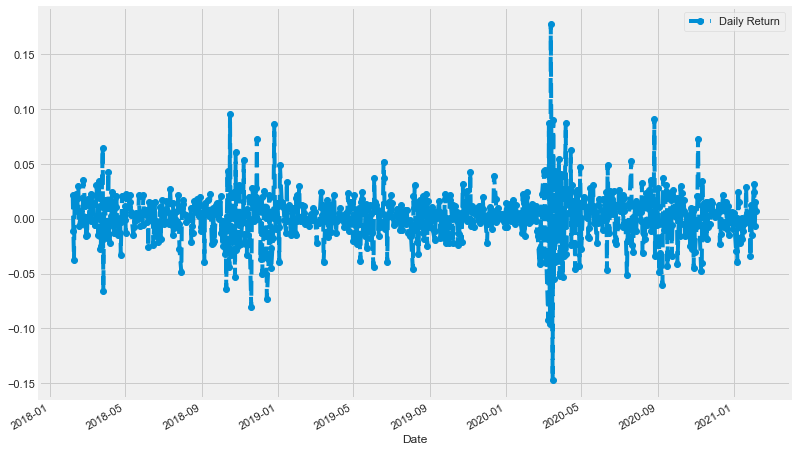

In [39]:
plt.figure(figsize=(12, 8))
adobe['Daily Return'] = adobe['Adj Close'].pct_change()
adobe['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.legend(loc='best')
plt.grid(True)

No handles with labels found to put in legend.


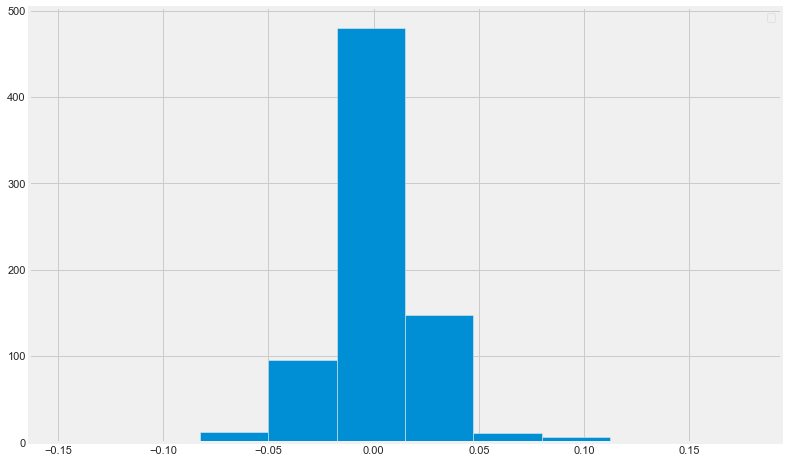

In [40]:
plt.figure(figsize=(12, 8))
adobe['Daily Return'].hist()
plt.legend(loc='best')
plt.grid(True)

<AxesSubplot:>

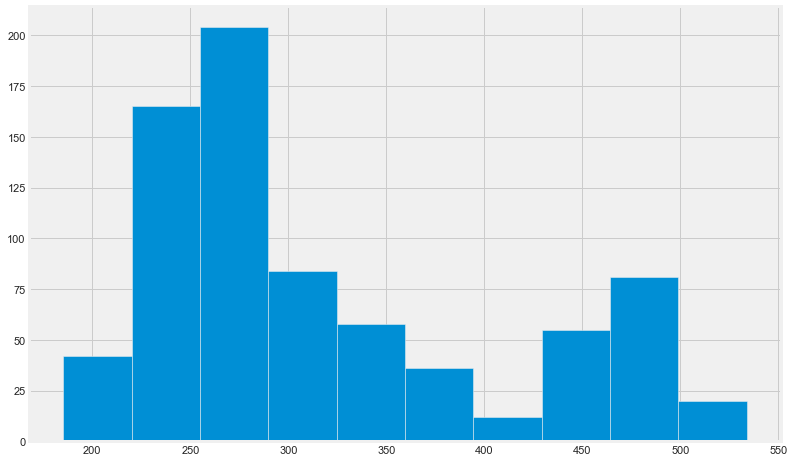

In [41]:
plt.figure(figsize=(12, 8))
adobe['Adj Close'].hist()

<AxesSubplot:>

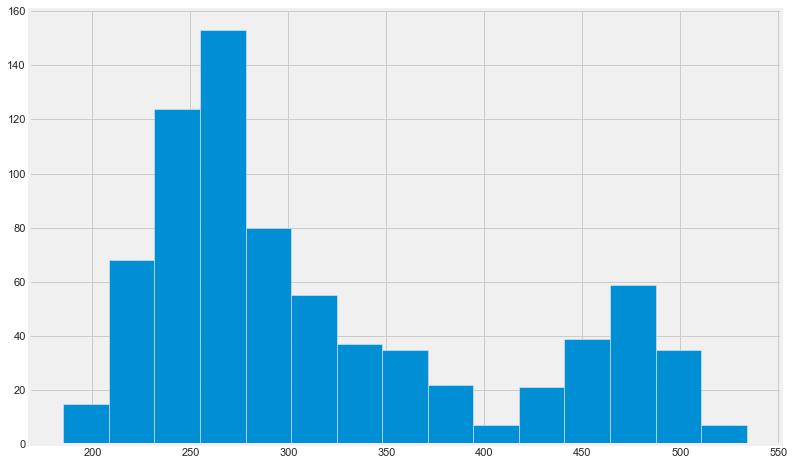

In [43]:
plt.figure(figsize=(12, 8))
adobe['Close'].hist(bins = 15)

In [44]:
X = np.log(adobe['Adj Close'])

<AxesSubplot:>

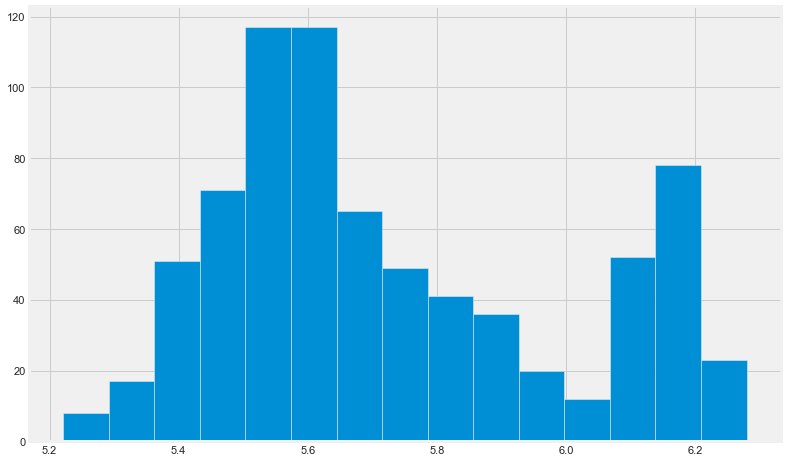

In [45]:
plt.figure(figsize=(12, 8))
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


# %load std_ipython_import.txt
import pandas as pd
import scipy as spy


import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
X.hist(bins = 15)

In [46]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


# %load std_ipython_import.txt
import pandas as pd
import scipy as spy


import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

No handles with labels found to put in legend.


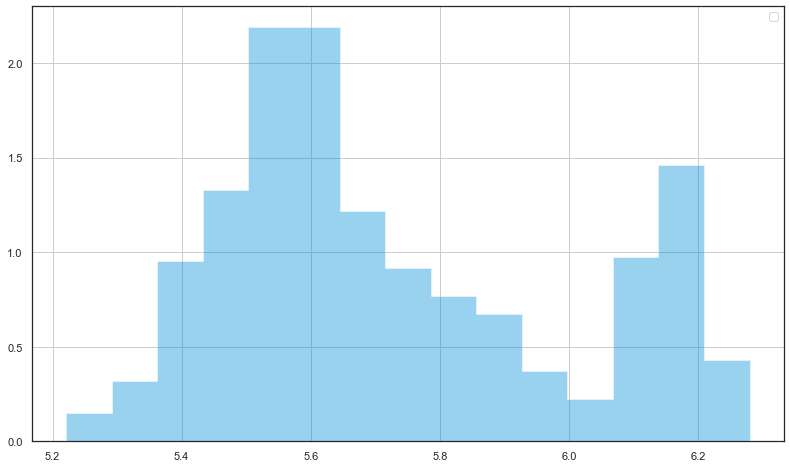

In [47]:
plt.figure(figsize=(12, 8))

plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.legend(loc='best')
plt.grid(True)

In [48]:
X = X.values.reshape(-1,1)

In [49]:
mixm = GaussianMixture(n_components=2, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(n_components=2, random_state=1, verbose=1)

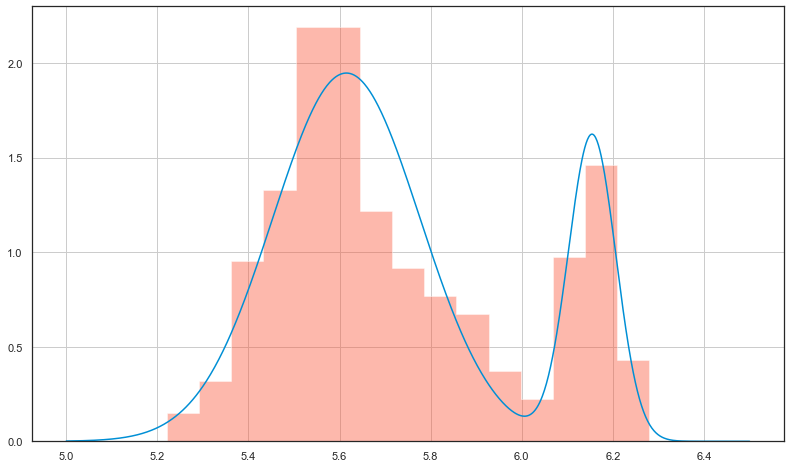

In [50]:
plt.figure(figsize=(12, 8))

x = np.linspace(5, 6.5, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.grid(True)

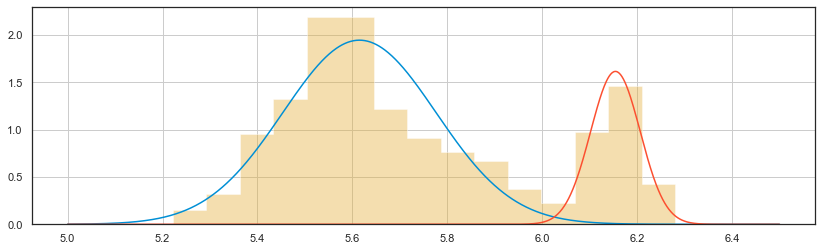

In [51]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.grid(True)

In [52]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

let's compute some information criteria to help us pick the best possible model.

The two most popular information criteria for statistical models are Akaike's Information criterion (AIC), discovered by the statistician Hirotugu Akaike, and the Bayesian information criterion (BIC), discovered by Gideon E. Schwarz, both of which are included in scikit-learn!

In [53]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

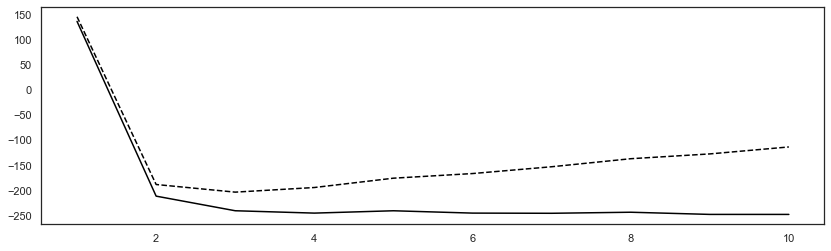

In [54]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')

Generally, the aim is to minimize BIC, so if you are in a negative territory, a negative number that has the largest modulus (deepest down in the negative territory) indicates the preferred mode

https://r.789695.n4.nabble.com/Which-model-to-keep-negative-BIC-td885058.html

In [55]:
mixm = GaussianMixture(n_components=3, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(n_components=3, random_state=1, verbose=1)

(array([0.11228774, 0.18714623, 0.22457548, 0.41172171, 0.67372643,
        1.23516513, 0.63629719, 2.0211793 , 1.98375006, 2.39547177,
        2.20832553, 2.17089629, 1.34745287, 1.08544814, 1.38488211,
        0.44915096, 0.74858493, 0.78601417, 0.67372643, 0.67372643,
        0.4865802 , 0.26200472, 0.14971699, 0.29943397, 0.86087267,
        1.08544814, 1.57202835, 1.34745287, 0.71115568, 0.14971699]),
 array([5.22122034, 5.2565137 , 5.29180706, 5.32710042, 5.36239379,
        5.39768715, 5.43298051, 5.46827387, 5.50356724, 5.5388606 ,
        5.57415396, 5.60944732, 5.64474069, 5.68003405, 5.71532741,
        5.75062078, 5.78591414, 5.8212075 , 5.85650086, 5.89179423,
        5.92708759, 5.96238095, 5.99767431, 6.03296768, 6.06826104,
        6.1035544 , 6.13884776, 6.17414113, 6.20943449, 6.24472785,
        6.28002121]),
 [<matplotlib.patches.Polygon at 0x1e72c192048>])

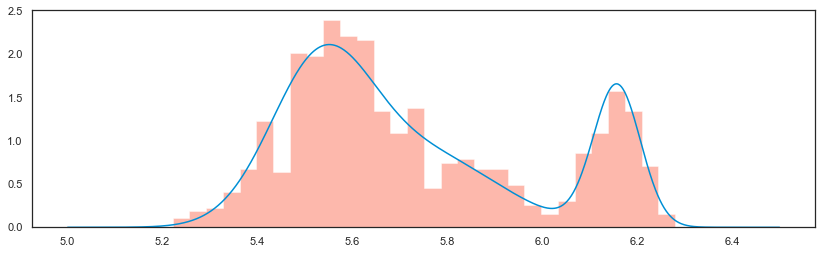

In [56]:
x = np.linspace(5, 6.5, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

(array([0.11228774, 0.18714623, 0.22457548, 0.41172171, 0.67372643,
        1.23516513, 0.63629719, 2.0211793 , 1.98375006, 2.39547177,
        2.20832553, 2.17089629, 1.34745287, 1.08544814, 1.38488211,
        0.44915096, 0.74858493, 0.78601417, 0.67372643, 0.67372643,
        0.4865802 , 0.26200472, 0.14971699, 0.29943397, 0.86087267,
        1.08544814, 1.57202835, 1.34745287, 0.71115568, 0.14971699]),
 array([5.22122034, 5.2565137 , 5.29180706, 5.32710042, 5.36239379,
        5.39768715, 5.43298051, 5.46827387, 5.50356724, 5.5388606 ,
        5.57415396, 5.60944732, 5.64474069, 5.68003405, 5.71532741,
        5.75062078, 5.78591414, 5.8212075 , 5.85650086, 5.89179423,
        5.92708759, 5.96238095, 5.99767431, 6.03296768, 6.06826104,
        6.1035544 , 6.13884776, 6.17414113, 6.20943449, 6.24472785,
        6.28002121]),
 [<matplotlib.patches.Polygon at 0x1e72d3b7da0>])

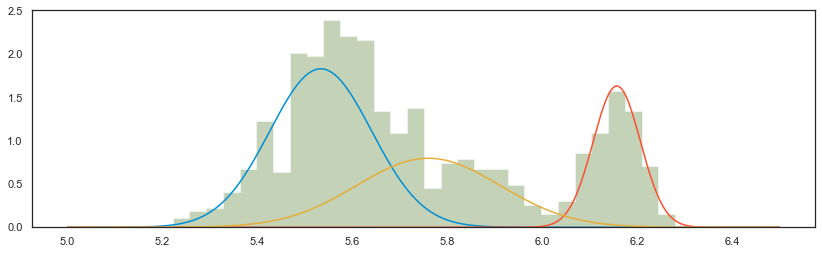

In [58]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)